### Visualize Data Augmentations

Visualize the augmentation effects to pick reasonable values for transformations.

In [1]:
import torch
import detectron2

print(torch.__version__)
print(detectron2.__version__)

1.7.1
0.4


In [2]:
import cv2
import os

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from detectron2.data import transforms as T

In [3]:
import sys
sys.path.append("../src")

from config import ProjConfig
from data_utils import get_train_aug

In [5]:
def get_extreme_aug():
    """
    A chain of random extreme data augmentation to be applied for visualization.
    Parameter values picked to yield realistic images after transformation.

    Returns:
        A list of detectron2.data.transforms.Augmentation
    """
    custom_aug = [
        T.RandomBrightness(.5, 2), 
        T.RandomContrast(0.5, 2),
        T.RandomFlip(prob=0.5, horizontal=True, vertical=False),
        T.RandomFlip(prob=0.5, horizontal=False, vertical=True),
        T.RandomApply(T.RandomRotation(angle=90, expand=True), prob=0.25),
        T.RandomApply(T.RandomRotation(angle=270, expand=True), prob=0.25),
        # To avoid losing information after rotation, specify to expand canvas.
        T.RandomApply(T.RandomRotation(angle=[-30, 30], expand=True), prob=0.8)
    ]
    return custom_aug

In [6]:
train_augs = T.AugmentationList(get_train_aug())
extreme_augs = T.AugmentationList(get_extreme_aug())

In [7]:
def compare_augmentation(orig, augmented):
    f, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0,].imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
    ax[0,].set_title("Original")
    ax[1,].imshow(cv2.cvtColor(augmented, cv2.COLOR_BGR2RGB))
    ax[1,].set_title("Augmented")
    plt.show()

In [8]:
proj_config = ProjConfig()

In [9]:
image = cv2.imread(os.path.join(proj_config.train_image_path, 'P0003.png'))
aug_input = T.AugInput(image)

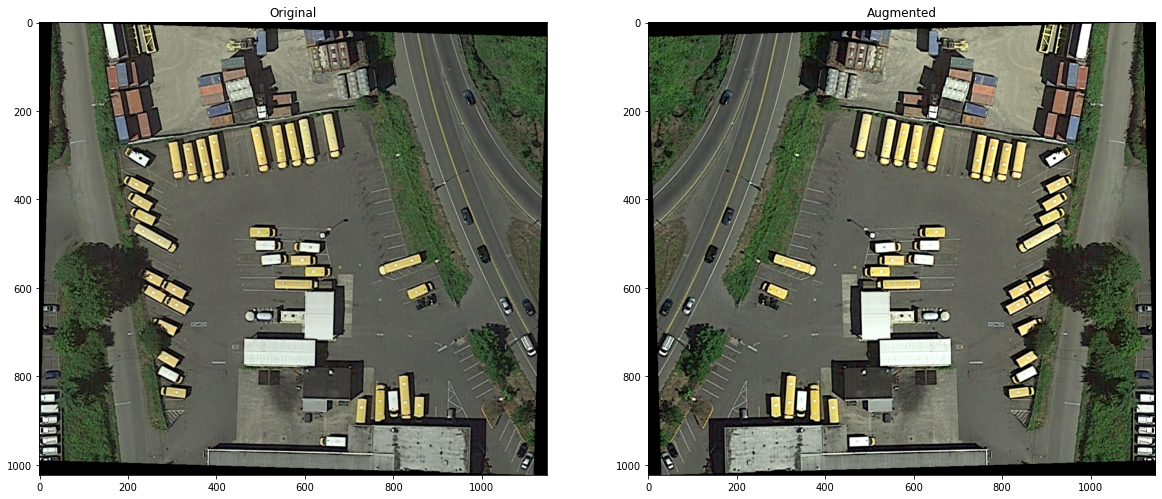

In [11]:
transform = train_augs(aug_input)
image_transformed = aug_input.image
compare_augmentation(image, image_transformed)

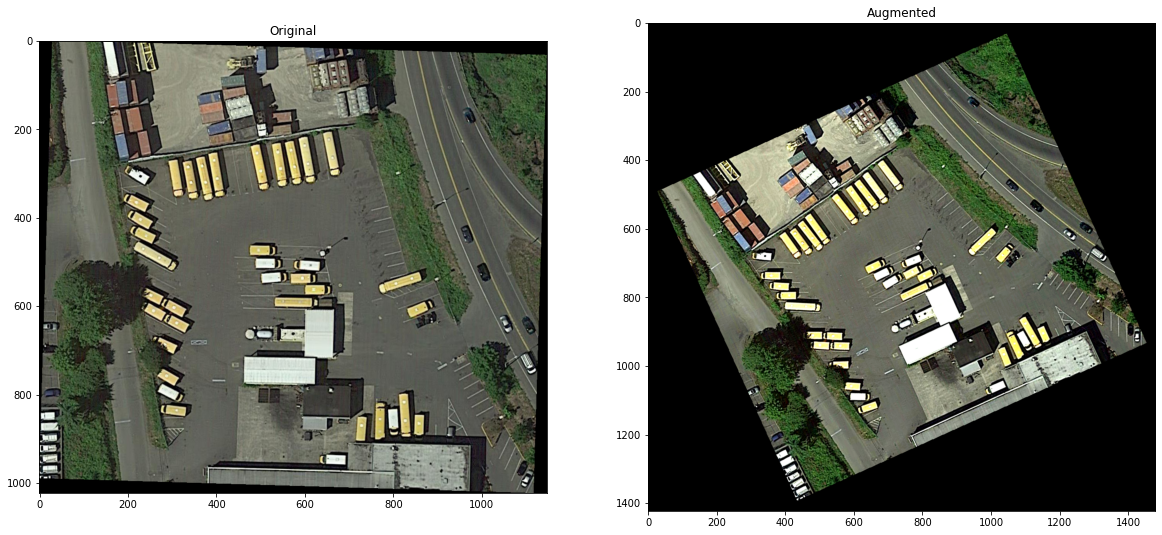

In [12]:
transform = extreme_augs(input)
image_transformed = input.image
compare_augmentation(image, image_transformed)